In [1]:
%reload_ext autoreload
%autoreload 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from utils.waves import WaveGenerator
from nn.nn import generate_data, create_nn, create_nn2, train_nn, eval_nn

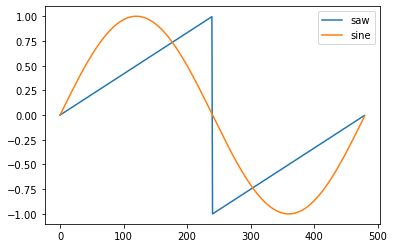

In [3]:
wg = WaveGenerator()

plt.plot(wg.gen_wave('saw', 100, 5)[:480], label='saw')
plt.plot(wg.gen_wave('sine', 100, 5)[:480], label='sine')
plt.legend()
plt.show()

In [12]:
secs = 1/64
X, y, X_train, y_train, X_test, y_test = generate_data(100000, secs=secs)

In [5]:
y[:100]

array([[2.04996215e+03, 8.64954295e-01],
       [2.27774858e+03, 7.16198557e-01],
       [6.49514406e+02, 9.90363710e-01],
       [2.90461730e+03, 7.81412907e-01],
       [2.78619059e+03, 4.49292798e-01],
       [1.80990670e+03, 5.96672053e-01],
       [1.81040285e+03, 9.37930334e-01],
       [2.56177172e+03, 9.08904212e-01],
       [3.75460495e+02, 5.08578609e-01],
       [3.75601007e+03, 6.87631897e-01],
       [2.59446840e+03, 4.32616521e-01],
       [3.61334172e+03, 7.68813189e-01],
       [5.95946608e+02, 6.91895202e-01],
       [3.30986752e+03, 8.92916952e-01],
       [3.08999178e+03, 5.95733955e-01],
       [8.68470344e+02, 9.31288332e-01],
       [2.38512306e+03, 9.60726975e-01],
       [6.06427097e+02, 4.95236534e-01],
       [2.86190568e+02, 7.51485469e-01],
       [3.58160160e+03, 8.31164764e-01],
       [2.60931128e+03, 8.27964921e-01],
       [2.22528497e+03, 9.91763781e-01],
       [2.02695048e+03, 8.31125263e-01],
       [1.25924862e+03, 8.55102066e-01],
       [1.170223

In [13]:
model = create_nn2(input_shape=X.shape[1],  loss = 'mean_squared_error')
history, model = train_nn(model, X, y,batch_size_frac=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               150200    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 300)               60300     
_________________________________________________________________
dense_10 (Dense)             (None, 500)               150500    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 1002      
Total params: 442,402
Trainable params: 442,402
Non-trainable params: 0
________________________________________________

In [7]:
y

array([[2.04996215e+03, 8.64954295e-01],
       [2.27774858e+03, 7.16198557e-01],
       [6.49514406e+02, 9.90363710e-01],
       ...,
       [3.10075308e+03, 7.24090912e-01],
       [3.02084956e+03, 8.93668643e-01],
       [3.80682301e+03, 6.23905164e-01]])

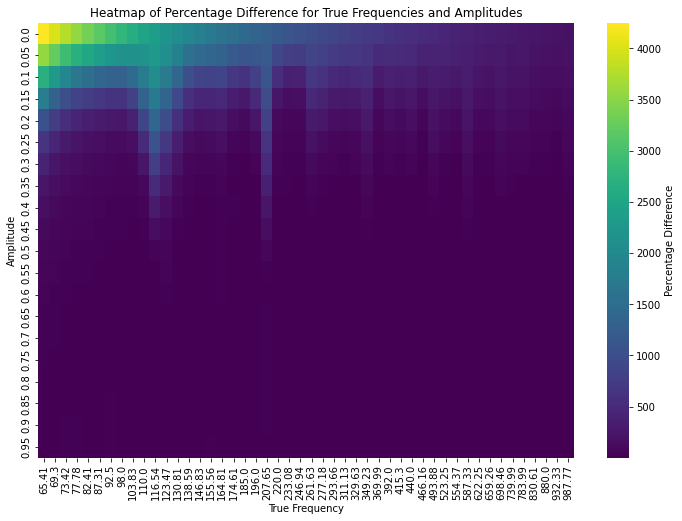

In [14]:
eval_nn(model, secs=secs, max_freq=1000)

In [9]:
model.save("../models/note_detect.h5", save_format="h5")

In [15]:
wg = WaveGenerator()
model.predict(np.stack([wg.gen_wave('sine', 92.25, secs=secs, noise_sd=0.01, amplitude=0.8)]))

array([[90.93167   ,  0.50684726]], dtype=float32)

In [11]:
model.weights[0]

<tf.Variable 'dense/kernel:0' shape=(750, 200) dtype=float32, numpy=
array([[ 0.10165067,  0.06577788, -0.03352853, ...,  0.06968854,
        -0.03669352, -0.05967396],
       [ 0.05645383,  0.0368474 , -0.01066122, ..., -0.06002469,
         0.04750749,  0.00222579],
       [-0.04926552,  0.02093931,  0.0078083 , ..., -0.00639239,
         0.04294437,  0.10360276],
       ...,
       [-0.01570836, -0.0816812 , -0.00958427, ..., -0.1012372 ,
         0.06938044, -0.08151609],
       [-0.09181493,  0.01747394,  0.07475211, ..., -0.03855616,
         0.0737844 ,  0.02052559],
       [ 0.01954179, -0.05503754,  0.08805723, ..., -0.01600913,
        -0.02961774, -0.05478795]], dtype=float32)>